In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Restaurant_Reviews.tsv',delimiter="\t",quoting=3)
data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.groupby('Liked').size()

Liked
0    500
1    500
dtype: int64

In [6]:
data.isna().sum()

Review    0
Liked     0
dtype: int64

In [7]:
data.head(2)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0


# Removing Numbers and punctuations

In [8]:
import re
review=re.sub('[^a-zA-Z]',' ',data['Review'][0])
print(review)

Wow    Loved this place 


In [9]:
#convert as lower case
review=review.lower()
review


'wow    loved this place '

In [10]:
#remove stopwords
from nltk.corpus import stopwords
review=review.split()
print(review)
review1=[word for word in review if not word in set(stopwords.words('english'))]
print('After Stopwords:\n',review1)

['wow', 'loved', 'this', 'place']
After Stopwords:
 ['wow', 'loved', 'place']


In [11]:
#Perform stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
review1=[ps.stem(word) for word in review1]
review1


['wow', 'love', 'place']

In [12]:
review2=' '.join(review1)
review2


'wow love place'

In [14]:
# Converting vector form
corpus1=[]
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
print(review2)
corpus1.append(review2)
print(corpus1)
x=cv.fit_transform(corpus1)
print(x.toarrayrray())

wow love place
['wow love place']


AttributeError: toarrayrray not found

# Apply all the above preprocess for whole dataset

In [15]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    print(review)
    corpus.append(review)


wow love place
crust good
tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price
get angri want damn pho
honeslti tast fresh
potato like rubber could tell made ahead time kept warmer
fri great
great touch
servic prompt
would go back
cashier care ever say still end wayyy overpr
tri cape cod ravoli chicken cranberri mmmm
disgust pretti sure human hair
shock sign indic cash
highli recommend
waitress littl slow servic
place worth time let alon vega
like
burritto blah
food amaz
servic also cute
could care less interior beauti
perform
right red velvet cake ohhh stuff good
never brought salad ask
hole wall great mexican street taco friendli staff
took hour get food tabl restaur food luke warm sever run around like total overwhelm
worst salmon sashimi
also combo like burger fri beer decent deal
like final blow
found place accid could happier
seem like good quick place grab bite familiar pub food favor look elsewher
overal like place lot
redeem qualiti r

restaur atmospher exquisit
good servic clean inexpens boot
seafood fresh gener portion
plu buck
servic par either
thu far visit twice food absolut delici time
good year ago
self proclaim coffe cafe wildli disappoint
veggitarian platter world
cant go wrong food
beat
stop place madison ironman friendli kind staff
chef friendli good job
better dedic boba tea spot even jenni pho
like patio servic outstand
goat taco skimp meat wow flavor
think
mac salad pretti bland get
went bachi burger friend recommend disappoint
servic stink
wait wait
place qualiti sushi qualiti restaur
would definit recommend wing well pizza
great pizza salad
thing went wrong burn saganaki
wait hour breakfast could done time better home
place amaz
hate disagre fellow yelper husband disappoint place
wait hour never got either pizza mani around us came later
know slow
staff great food delish incred beer select
live neighborhood disappoint back conveni locat
know pull pork could soooo delici
get incred fresh fish prepar ca

yellowtail carpaccio melt mouth fresh
tri go back even empti
go eat potato found stranger hair
spici enough perfect actual
last night second time dine happi decid go back
even hello right
dessert bit strang
boyfriend came first time recent trip vega could pleas qualiti food servic
realli recommend place go wrong donut place
nice ambianc
would recommend save room
guess mayb went night disgrac
howev recent experi particular locat good
know like restaur someth
avoid establish
think restaur suffer tri hard enough
tapa dish delici
heart place
salad bland vinegrett babi green heart palm
two felt disgust
good time
believ place great stop huge belli hanker sushi
gener portion great tast
never go back place never ever recommend place anyon
server went back forth sever time even much help
food delici
hour serious
consid theft
eew locat need complet overhaul
recent wit poor qualiti manag toward guest well
wait wait wait
also came back check us regularli excel servic
server super nice check us man

place honestli blown
definit would eat
wast money
love put food nice plastic contain oppos cram littl paper takeout box
cr pe delic thin moist
aw servic
ever go
food qualiti horribl
price think place would much rather gone
servic fair best
love sushi found kabuki price hip servic
favor stay away dish
poor servic
one tabl thought food averag worth wait
best servic food ever maria server good friendli made day
excel
paid bill tip felt server terribl job
lunch great experi
never bland food surpris consid articl read focus much spice flavor
food way overpr portion fuck small
recent tri caballero back everi week sinc
buck head realli expect better food
food came good pace
ate twice last visit especi enjoy salmon salad
back
could believ dirti oyster
place deserv star
would recommend place
fact go round star awesom
disbelief dish qualifi worst version food ever tast
bad day low toler rude custom servic peopl job nice polit wash dish otherwis
potato great biscuit
probabl would go
flavor perfec

In [16]:
type(review)

str

In [17]:
type(corpus)

list

In [18]:
corpus_dataset=pd.DataFrame(corpus)
corpus_dataset.head()


,0
0,wow love place
1,crust good
2,tasti textur nasti
3,stop late may bank holiday rick steve recommen...
4,select menu great price


In [19]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,wow love place,wow love place
1,crust good,crust good
2,tasti textur nasti,tasti textur nasti
3,stop late may bank holiday rick steve recommen...,stop late may bank holiday rick steve recommen...
4,select menu great price,select menu great price


In [20]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head(3)


,corpus
0,wow love place
1,crust good
2,tasti textur nasti


In [21]:
corpus_dataset.to_csv('corpus_dataset.csv')

In [22]:
#Create a BOW Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()


In [23]:
x.shape


(1000, 1565)

In [24]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
y=data.iloc[:,1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [27]:
x.shape

(1000, 1565)

In [28]:
y.shape

(1000,)

# ML based NLP classification model

In [29]:
#Spliting data for training & testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
#Model build
from sklearn.naive_bayes import GaussianNB
gauss_clf=GaussianNB()
#Training
print('='*100)
print('Training Started....')
gauss_clf.fit(xtrain,ytrain)
print('\n Testing is performing....')
ypred=gauss_clf.predict(xtest)
print('predicted Class:\n',ypred)
print('='*100)
#Performance Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Classification Report:\n',classification_report(ytest,ypred))
print('='*100)

Training Started....

 Testing is performing....
predicted Class:
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1]
Confusion Matrix:
 [[60 48]
 [15 77]]
Accuracy Score:	 0.685
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.56      0.66       108
           1       0.62      0.84      0.71        92

    accuracy                           0.69       200
   macro avg       0.71      0.70      0.68       200
weighted avg       0.72      0.69      0.68       200



<Axes: >

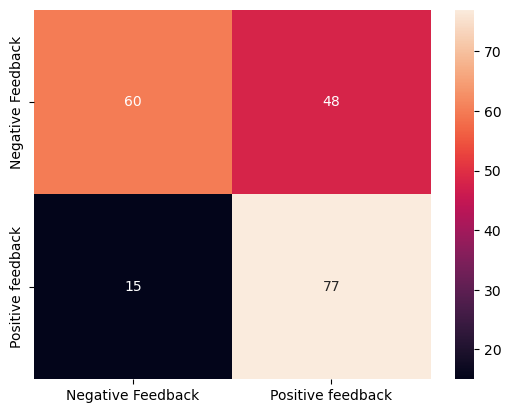

In [30]:
import seaborn as sns
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive feedback'],
 yticklabels=['Negative Feedback','Positive feedback'])


# Unseen text- Prediction

In [31]:
review='nice service'
input1=[review]
input_data=cv.transform(input1).toarray()
input_pred=gauss_clf.predict(input_data)
if input_pred[0]==1:
    print('Review is Positive')
else:
    print('Review is Negative')


Review is Positive


In [32]:
review='long waiting time in the restaurant'
input1=[review]
input_data=cv.transform(input1).toarray()
input_pred=gauss_clf.predict(input_data)
if input_pred[0]==1:
    print('Review is Positive')
else:
    print('Review is Negative')


Review is Negative
